In [1]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [2]:
# Load the dataset from the provided URL
url = 'https://github.com/Premalatha-success/Datasets/blob/main/input_data.xlsx?raw=true'
df = pd.read_excel(url)

In [3]:
# Replace any NaN values in the 'Short description' column with an empty string
df['Short description'] = df['Short description'].fillna('')

In [4]:
# Convert text to lowercase and remove punctuation, digits, and special characters
df['cleaned_text'] = df['Short description'].str.lower()
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: re.sub(r'[^a-z\s]', '', x))

In [5]:
# Create a word vocabulary using TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['cleaned_text'])

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, df['Assignment group'], test_size=0.2, random_state=42)

In [8]:
# Define a function to train and evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    # Train the model on the training data
    model.fit(X_train, y_train)
    
    # Predict the labels on the test data
    y_pred = model.predict(X_test)
    
    # Generate a classification report
    report = classification_report(y_test, y_pred, zero_division=0, output_dict=True)
    
    # Print the classification report
    print(f"\n{model_name} Classification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))
    
    # Return the report
    return report

In [10]:
# Dictionary of models to evaluate
models = {
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier()
}

# Dictionary to store the results
results = {}
for model_name, model in models.items():
    # Evaluate each model and store the result
    results[model_name] = evaluate_model(model, X_train, X_test, y_train, y_test, model_name)



KNN Classification Report:
              precision    recall  f1-score   support

       GRP_0       0.71      0.75      0.73       761
       GRP_1       0.00      0.00      0.00         8
      GRP_10       0.82      0.38      0.51        24
      GRP_11       0.00      0.00      0.00         5
      GRP_12       0.65      0.40      0.50        42
      GRP_13       0.25      0.04      0.07        26
      GRP_14       1.00      0.10      0.18        20
      GRP_15       0.00      0.00      0.00         8
      GRP_16       1.00      0.10      0.18        20
      GRP_17       1.00      1.00      1.00        17
      GRP_18       0.50      0.06      0.10        18
      GRP_19       0.33      0.02      0.03        58
       GRP_2       0.67      0.16      0.25        51
      GRP_20       0.00      0.00      0.00         5
      GRP_21       0.00      0.00      0.00         7
      GRP_22       0.00      0.00      0.00         5
      GRP_23       0.25      0.33      0.29         3

In [15]:
# KNN Classification Report - Accuracy: 0.46
# SVM Classification Report - Accuracy: 0.61
# Random Forest Classification Report - Accuracy: 0.63

In [11]:
# Extract precision, recall, and f1-score for each model
precision = {model: results[model]['weighted avg']['precision'] for model in results}
recall = {model: results[model]['weighted avg']['recall'] for model in results}
f1_score = {model: results[model]['weighted avg']['f1-score'] for model in results}

In [12]:
# Create a DataFrame to store these metrics
metrics_df = pd.DataFrame([precision, recall, f1_score], index=['Precision', 'Recall', 'F1-Score']).T

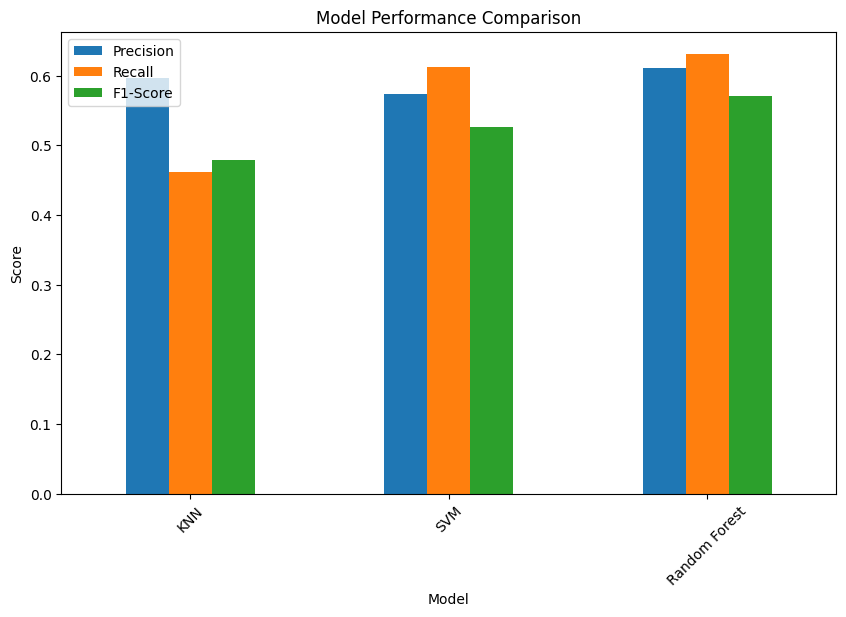

In [13]:
# Plot the metrics in a bar chart
metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.show()

In [ ]:
# Based on the results - The Random Forest classifier is recommended for this incident management classification task.
# Random Forest: Best performance overall with the highest accuracy, precision, recall, & F1 score.
# SVM: Good performance, better than KNN, with balanced metrics.
# KNN: Moderate performance, lower recall and F1-score compared to the other models.